### Data Preparation

-------

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time

In [3]:
% matplotlib inline
#import scikitplot
#import scikitplot.plotters as skplt

In [14]:
import nltk

#### Training Data

In [45]:
data = pd.read_csv('alldf.csv')

#### Preprocessing

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

tfidf_vectorizer = TfidfVectorizer(analyzer="word",
                                   tokenizer=nltk.word_tokenize,
                                   preprocessor=None,
                                   stop_words='english',
                                   max_features=None)
sparce_tfidf = tfidf_vectorizer.fit_transform(data['values'])
tfidf = sparce_tfidf.toarray()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dibakarsigdel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
from sklearn.preprocessing import LabelEncoder
label = data['term'].values.ravel()
# Label Incoding
label =  LabelEncoder().fit(label).transform(label)

In [97]:
len(set(label))

38

-------

#### Data splitting

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
def get_train_test_data(features,target):

    #shuffle the data
    features, target = shuffle(features, target)

    # Split the 'features' and 'targets' data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, 
                                                    test_size = 0.5,
                                                    random_state = 0)
    # Show the results of the split
    print ("Training set has {} samples.".format(X_train.shape[0]))
    print ("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [99]:
X_train, X_test, y_train, y_test = get_train_test_data(tfidf,label)

Training set has 5620 samples.
Testing set has 5621 samples.


-------

### Train a Model : Neural Network

In [100]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
import os

In [101]:
# metrics
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, precision_score,recall_score

In [102]:
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]
input_dim = X_train.shape[1]

In [103]:
num_classes

38

In [104]:
# Model saving callback
ckpt_callback = ModelCheckpoint('tfidf_nn', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')


model = Sequential()
model.add(Dense(500, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(300, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(100, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               2783000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
__________

In [105]:
# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy',\
              optimizer='rmsprop',\
              metrics=['accuracy'])

In [106]:
print("Training...")
history = model.fit(X_train,\
          y_train,\
          nb_epoch=40,\
          batch_size=64,\
          validation_split=0.3,\
          verbose=2)

Training...


/Users/dibakarsigdel/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3933 samples, validate on 1687 samples
Epoch 1/40
 - 7s - loss: 2.9685 - acc: 0.1401 - val_loss: 2.5940 - val_acc: 0.1932
Epoch 2/40
 - 6s - loss: 2.4182 - acc: 0.2685 - val_loss: 2.1653 - val_acc: 0.4001
Epoch 3/40
 - 6s - loss: 1.8188 - acc: 0.4757 - val_loss: 1.9830 - val_acc: 0.4292
Epoch 4/40
 - 6s - loss: 1.3517 - acc: 0.6247 - val_loss: 1.8967 - val_acc: 0.4902
Epoch 5/40
 - 7s - loss: 1.0159 - acc: 0.7223 - val_loss: 2.0690 - val_acc: 0.5442
Epoch 6/40
 - 6s - loss: 0.8020 - acc: 0.7852 - val_loss: 2.0626 - val_acc: 0.5483
Epoch 7/40
 - 6s - loss: 0.6577 - acc: 0.8253 - val_loss: 2.0279 - val_acc: 0.5750
Epoch 8/40
 - 6s - loss: 0.5724 - acc: 0.8502 - val_loss: 1.9965 - val_acc: 0.5750
Epoch 9/40
 - 6s - loss: 0.4867 - acc: 0.8724 - val_loss: 2.0563 - val_acc: 0.5732
Epoch 10/40
 - 6s - loss: 0.4346 - acc: 0.8866 - val_loss: 2.0705 - val_acc: 0.5851
Epoch 11/40
 - 6s - loss: 0.3907 - acc: 0.9001 - val_loss: 2.1793 - val_acc: 0.5910
Epoch 12/40
 - 7s - loss: 0.3517 - ac

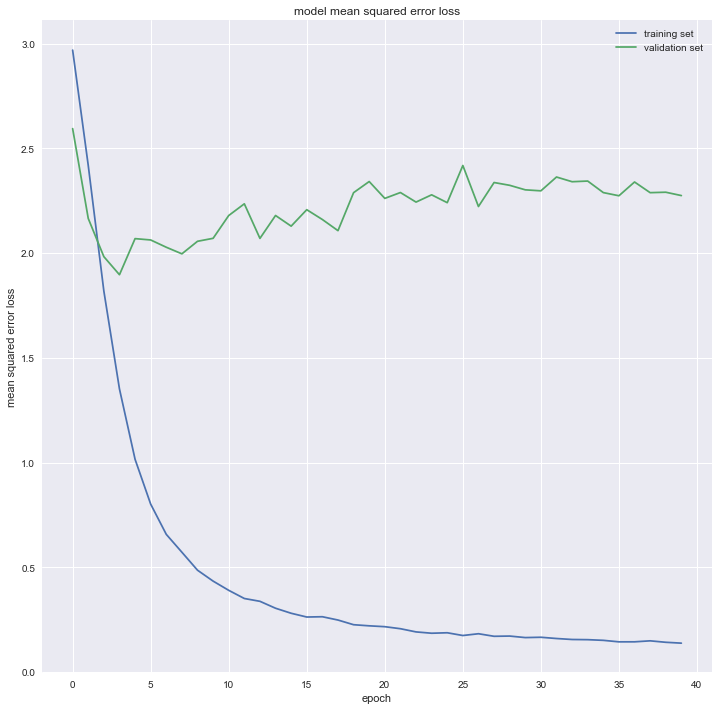

In [107]:
import seaborn as sns
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [144]:
probas = model.predict(X_test)
pred_indices = np.argmax(probas, axis=1)
classes = np.unique(y_test)
preds = classes[pred_indices]
#print('Log loss: {}'.format(log_loss(y_test, probas)))
#print('Accuracy: {}'.format(accuracy_score(y_test, preds)))
#skplt.plot_confusion_matrix(y_test, preds)

In [173]:
cm = [[0.0 for k in range(38)] for l in range(38)]
for x,y in zip(y_test,preds):
    cm[x][y] = cm[x][y] + 0.1

In [174]:
uterm = set(data['term'])

In [175]:
ncm = pd.DataFrame(cm, index = uterm, columns = uterm )

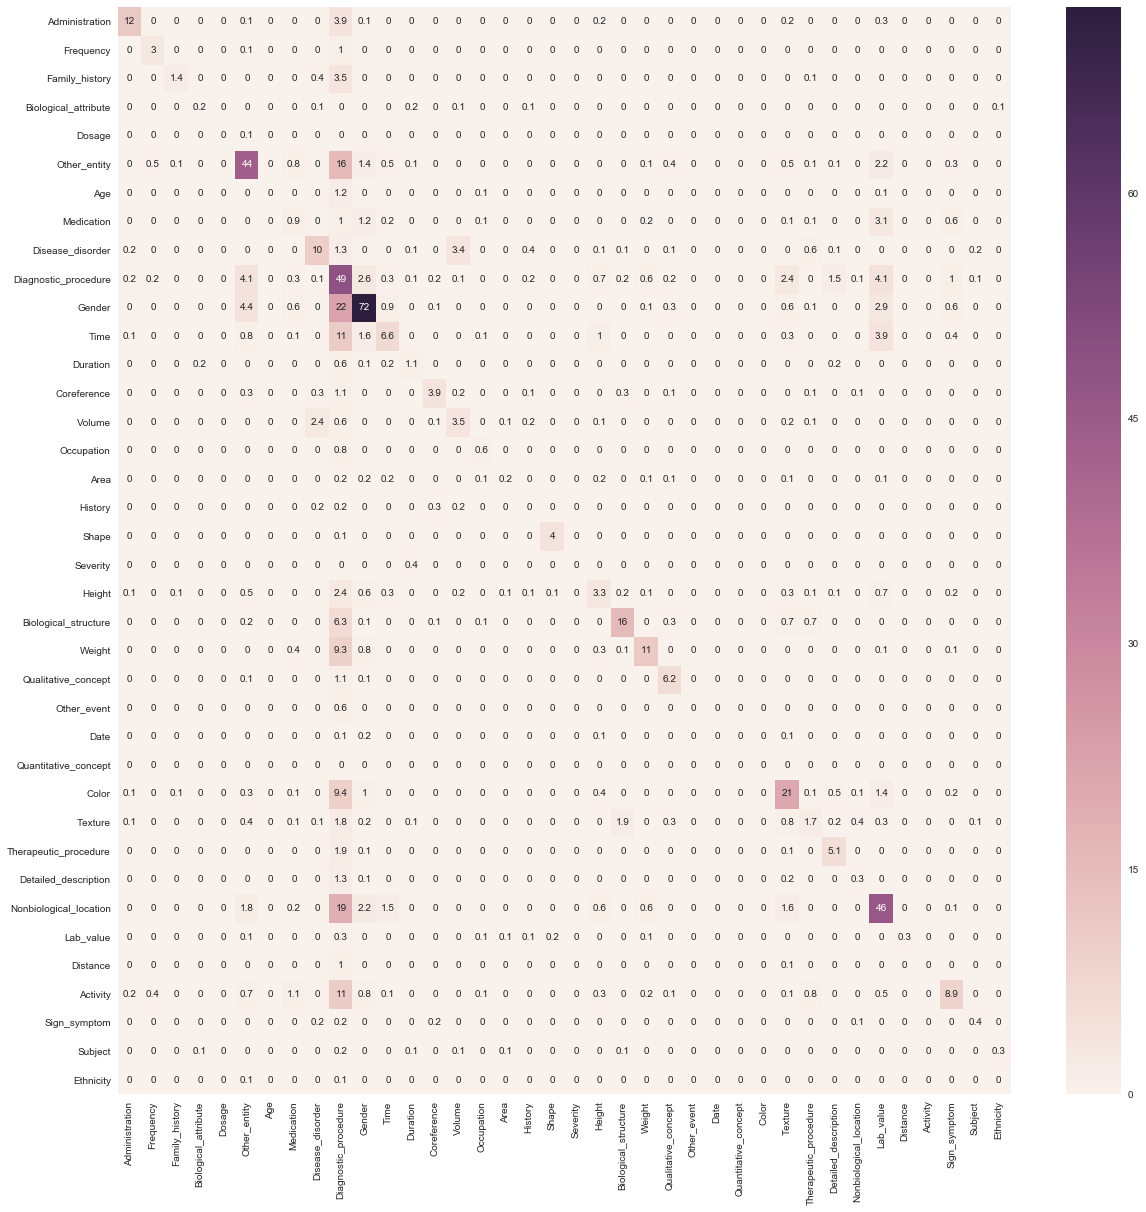

In [176]:
plt.figure(figsize=[20,20])
sns.heatmap(ncm,annot = True)
plt.show()

In [166]:
ncm

,Administration,Frequency,Family_history,Biological_attribute,Dosage,Other_entity,Age,Medication,Disease_disorder,Diagnostic_procedure,...,Texture,Therapeutic_procedure,Detailed_description,Nonbiological_location,Lab_value,Distance,Activity,Sign_symptom,Subject,Ethnicity
Administration,116,0,0,0,0,1,0,0,0,39,...,2,0,0,0,3,0,0,0,0,0
Frequency,0,30,0,0,0,1,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
Family_history,0,0,14,0,0,0,0,0,4,35,...,0,1,0,0,0,0,0,0,0,0
Biological_attribute,0,0,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Dosage,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other_entity,0,5,1,0,0,438,0,8,0,157,...,5,1,1,0,22,0,0,3,0,0
Age,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,1,0,0,0,0,0
Medication,0,0,0,0,0,0,0,9,0,10,...,1,1,0,0,31,0,0,6,0,0
Disease_disorder,2,0,0,0,0,0,0,0,103,13,...,0,6,1,0,0,0,0,0,2,0
Diagnostic_procedure,2,2,0,0,0,41,0,3,1,485,...,24,0,15,1,41,0,0,10,1,0


### Word2Vec

In [192]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [193]:
# Use the Keras tokenizer
num_words = 2000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(wrd)

In [205]:
data.head()

,Unnamed: 0,term,values,label
0,0,Age,23 year old,2
1,1,Ethnicity,white,15
2,2,Gender,male,18
3,3,History,4 year history of Crohn's disease,20
4,4,Disease_disorder,Crohn's disease,11


In [194]:
# Pad the data 
X = tokenizer.texts_to_sequences(data['values'])
X = pad_sequences(X, maxlen=2000)

In [207]:
X.shape

(11241, 2000)

In [221]:
# Build out our simple LSTM
embed_dim = 100
lstm_out = 100

# Model saving callback


model = Sequential()

model.add(Embedding(num_words, embed_dim, input_length = X.shape[1]))

model.add(LSTM(lstm_out, return_sequences=True, input_shape=(embed_dim, 1) ))

model.add(LSTM(50, recurrent_dropout=0.2, dropout=0.2))

model.add(Dense(38,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 2000, 100)         200000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 2000, 100)         80400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_18 (Dense)             (None, 38)                1938      
Total params: 312,538
Trainable params: 312,538
Non-trainable params: 0
_________________________________________________________________
None


In [222]:
from sklearn.model_selection import train_test_split
Y = pd.get_dummies(data['term']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify=Y)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8992, 2000) (8992, 38)
(2249, 2000) (2249, 38)


In [223]:
X_train.shape

(8992, 2000)

In [224]:
batch_size = 64
history = model.fit(X_train,
          Y_train, 
          epochs=5, 
          batch_size=batch_size,
          validation_split=0.2)

Train on 7193 samples, validate on 1799 samples
Epoch 1/5
2496/7193 [=========>....................] - ETA: 20:36 - loss: 3.0808 - acc: 0.1863

KeyboardInterrupt: 

#### Prediction

In [4]:
import os
txt_files = os.listdir("./data/txt")[1:]

In [5]:
txt_files[0:10]

['17803823.txt',
 '18561524.txt',
 '19214295.txt',
 '19860006.txt',
 '19860007.txt',
 '20146086.txt',
 '21129213.txt',
 '21254744.txt',
 '21308977.txt',
 '21477357.txt']

In [29]:
wrd = []
for file in txt_files:
    with open('./data/txt/' + file) as f:
        for line in f:
            words = line.split()
            #print(line.split())
            for item in words:
                wrd.append(item)

In [30]:
len(wrd)

43751

--------

#### Bag of words

In [35]:
def df_creater(words):
    unique_wrd = set(words)
    
    
    count = []
    for term in unique_wrd:
        n = 0
        for another_term in words:
            if another_term  == term:
                n = n+1
        count.append([term,n])
    cnt = pd.DataFrame(count, columns = ["term","values"])
    cnt = cnt.sort_values(by = ['values'],ascending=False)
    ndf = pd.DataFrame(index = cnt['term'])
    ndf["values"] = np.array(cnt["values"], dtype = float)
    
    return ndf
    

In [38]:
ndf = df_creater(wrd)

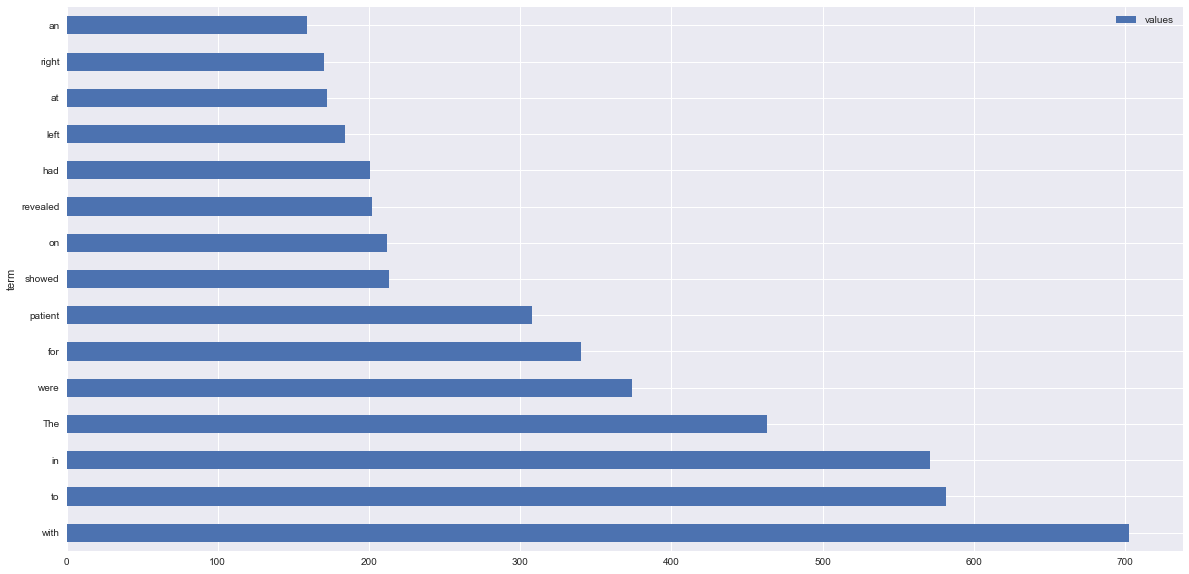

In [44]:
ndf = ndf[1:100]
ndf.plot.barh(stacked=False,figsize=(20,10) )

In [177]:
ndf.head()

,values
term,
with,703.0
to,582.0
in,571.0
The,463.0
were,374.0


##### TFIDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf_vectorizer = TfidfVectorizer(analyzer="word",
                                   tokenizer=nltk.word_tokenize,
                                   preprocessor=None,
                                   stop_words='english',
                                   max_features=None)
sparce_tfidf = tfidf_vectorizer.fit_transform(wrd)

In [18]:
sparce_tfidf.shape

(372, 154)

In [20]:
tfidf = sparce_tfidf.toarray()
tfidf.shape

(372, 154)

-----------------

In [225]:
tfidf_vectorizer.fit('disease')

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function word_tokenize at 0x10ccc92f0>, use_idf=True,
        vocabulary=None)